In [5]:
# This code Imports modules/packages called NumPy for numerical computations, Pandas for data manipulation,
# Matplotlib for visualizations and lastly Seaborn for statistical graphics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# loading the data from the Mall customers CSV file into the Python environment.
# To make it easier to analyze and manipulate the data.
df= pd.read_csv(r"C:\Users\12094\Documents\Pandas\pandas\Mall_Customers.csv")


In [30]:
# if we wanna know information about the DataFrame,including data types of each column, number of non-null entries, and memory usage. 
# This helps to understand the data and identify any potential issues or preprocessing it may require. 
# we can observe that Middle 50% of the customers are between 28.75 and 49 years old,Incomes vary widely, ranging from 15 to 137 thousand dollars. 
# we can also observe that Middle 50% of customers have spending scores between 34.75 and 73

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   label                   200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 7.2+ KB
None
              Age  Annual Income (k$)  Spending Score (1-100)       label
count  200.000000          200.000000              200.000000  200.000000
mean    38.850000           60.560000               50.200000    2.130000
std     13.969007           26.264721               25.823522    1.157497
min     18.000000           15.000000                1.000000    0.000000
25%     28.750000           41.500000               34.750000    2.000000
50%     36.000000      

In [13]:
##if we want to see how the data looks like that is imported 
# below output displays the first few rows of dataset usually the default is 5.

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#I will drop CustomerID column because in this case it is of no use
#CustomerID is like a primary key for each customer it is unique hence won't help to group customers with similar spending habits.
# It won't affect how close data points are to each other.

df.drop(["CustomerID"], axis = 1, inplace=True)

In [10]:
#cross checking if the customerid column has indeed been deleted.
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\12094\AppData\Local\Temp\ipykernel_20376\1149479267.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette="Set2")


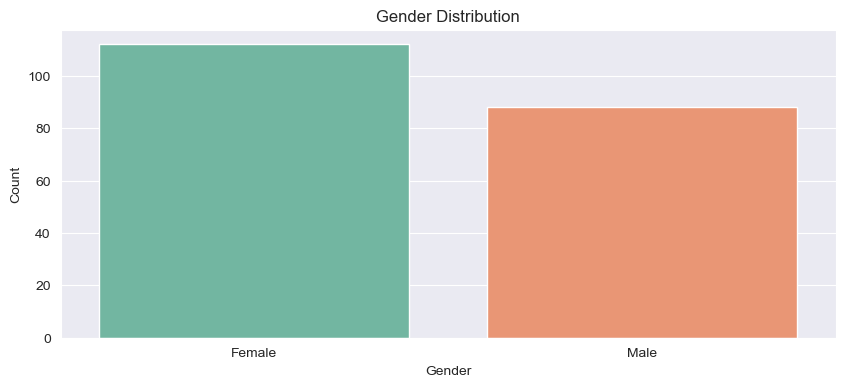

In [11]:
# Inorder to understand if there's a skew towards one gender and also to know,
# if the gender distribution is uneven which might require data cleaning steps we are Counting
# how many males and females are in the data by visualizing it with a bar chart.
# we can observe that the two bars are roughly equal in height, which means a balanced gender distribution in the data

genders = df.Gender.value_counts()


sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=genders.index, y=genders.values, palette="Set2")


plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

C:\Users\12094\AppData\Local\Temp\ipykernel_31192\1990289077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Set3")  # Use a different built-in palette


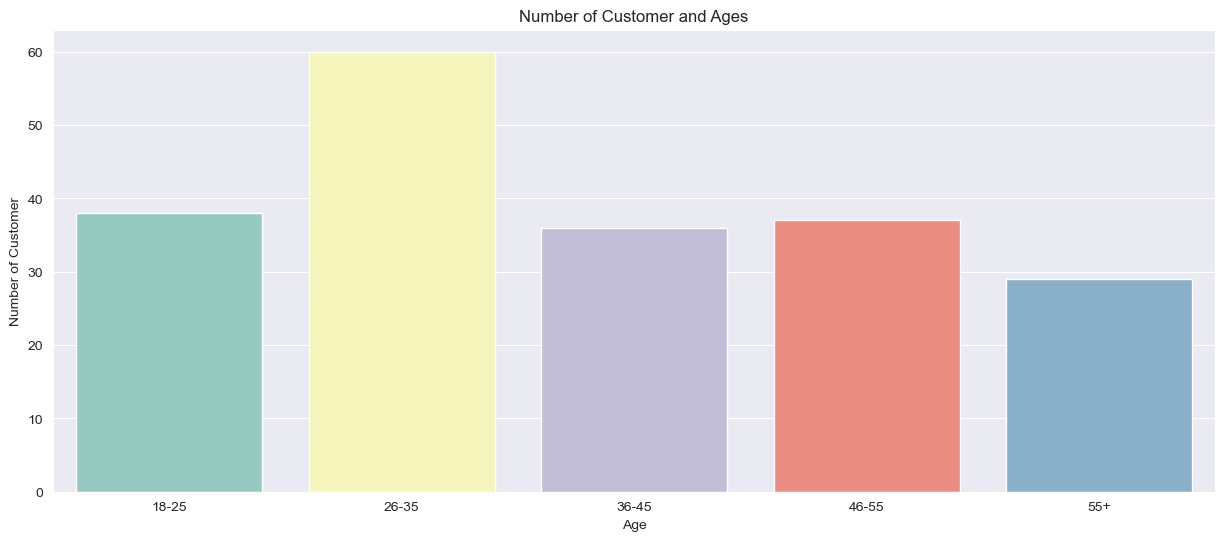

In [25]:
# To understand age distribution inroder to identify clusters based on age groups and also to know
# how many customers fall into each age group, we visualise it using the below code.
# we can observe that among the customers a huge number of customers belong to the age range 26-35 years.


x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=x, y=y, palette="Set3") 
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

C:\Users\12094\AppData\Local\Temp\ipykernel_20376\1457057860.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="YlGnBu")  # Use a different built-in palette


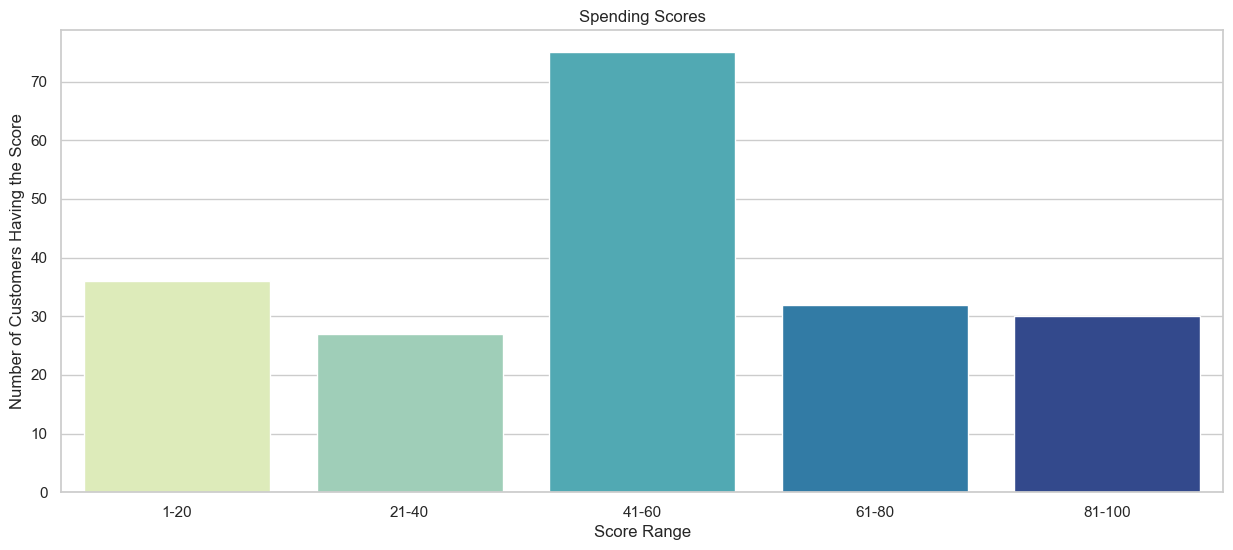

In [28]:
#To understand how many customers across spending scores range fall under who spend a lot, a little, or moderately.
# This code creates a bar chart to show how many customers fall into each spending score range which will help us
# to identify which features to include in K-Means 
#from the output we can say a larger portion of customers fall under lower spending scores.

ss1_20 = df[(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss21_40 = df[(df['Spending Score (1-100)'] > 20) & (df['Spending Score (1-100)'] <= 40)]
ss41_60 = df[(df['Spending Score (1-100)'] > 40) & (df['Spending Score (1-100)'] <= 60)]
ss61_80 = df[(df['Spending Score (1-100)'] > 60) & (df['Spending Score (1-100)'] <= 80)]
ss81_100 = df[(df['Spending Score (1-100)'] > 80) & (df['Spending Score (1-100)'] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20), len(ss21_40), len(ss41_60), len(ss61_80), len(ss81_100)]

plt.figure(figsize=(15, 6))
sns.barplot(x=ssx, y=ssy, palette="YlGnBu") 
plt.title("Spending Scores")
plt.xlabel("Score Range")
plt.ylabel("Number of Customers Having the Score")
plt.show()






C:\Users\12094\AppData\Local\Temp\ipykernel_20376\303598311.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="plasma")


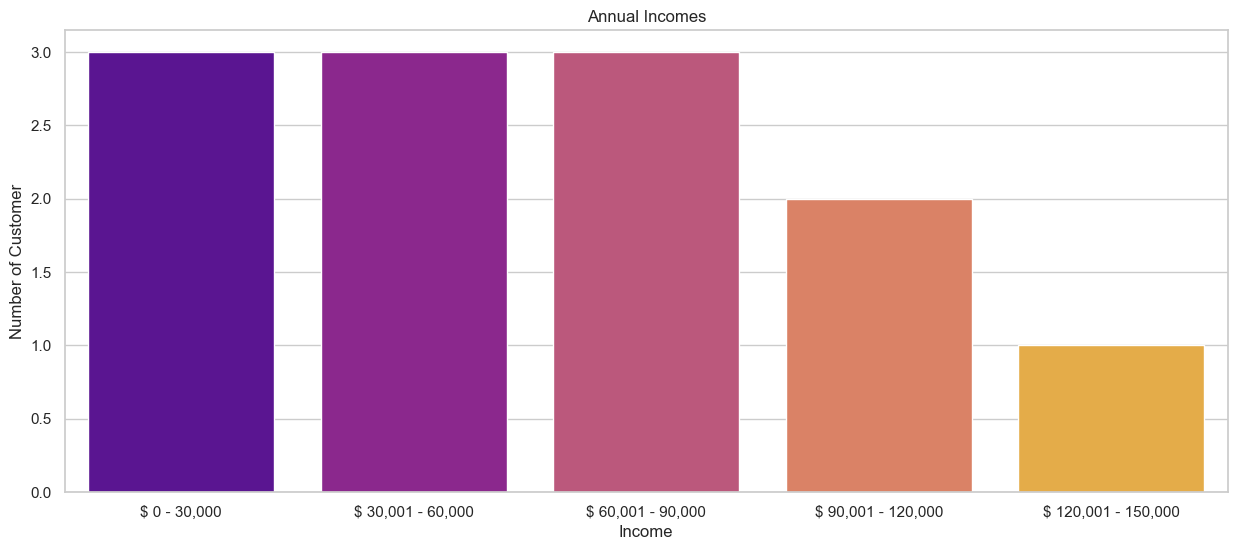

In [23]:
# This code creates a bar chart to visualize how many customers fall into each annual income range that we have specified 
# this can guide our choice of the number of clusters (K) in K-Means and which features to include.
# from the graph we can say that a significant amount of customer belong to lower to moderate income groups. The data is
# more skewed towards the income range $0 to $90K

ai0_30 = pd.DataFrame({'customer_id': [1, 2, 3]})  
ai31_60 = pd.DataFrame({'customer_id': [4, 5, 6]})  
ai61_90 = pd.DataFrame({'customer_id': [7, 8, 9]})  
ai91_120 = pd.DataFrame({'customer_id': [10, 11]})
ai121_150 = pd.DataFrame({'customer_id': [12]})

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette="plasma")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

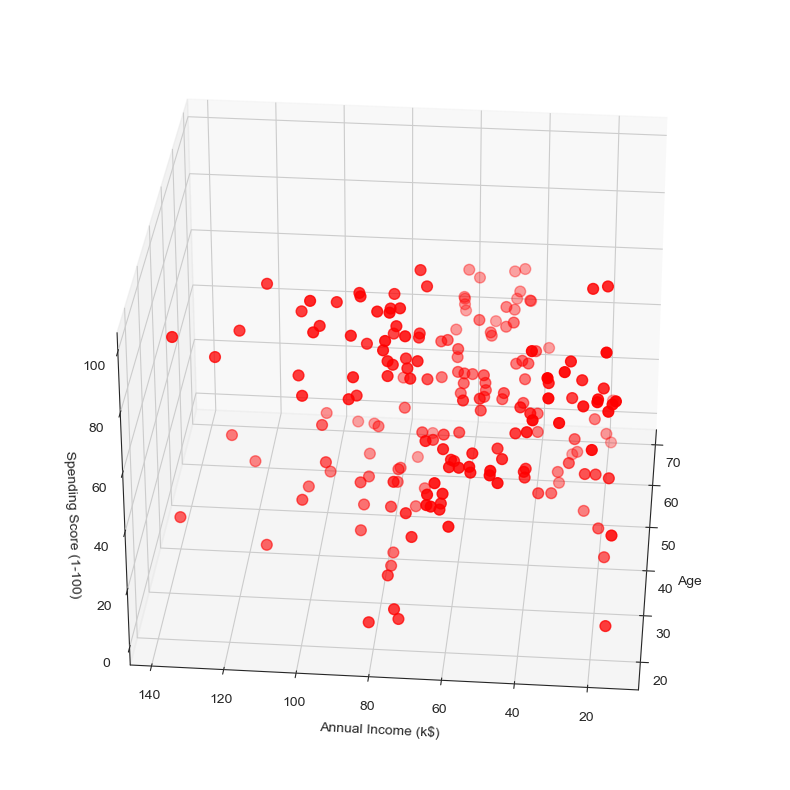

In [13]:
# By seeing how data points cluster in 3D space,we can identify potential customer segments 
# based on a combination of age, income, and spending habits which can also help in choice of the number of clusters (k)

# Interpretation: we can observe that high spenders are who are older and have a higher annual income.
#                middle-aged customers (around 40-50 years old) with moderate spending scores across a different range of incomes.
#                group of younger customers (around 20-35 years old) with lower incomes who spend less.


from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='red', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()



C:\Users\12094\anaconda3\envs\udemy\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\12094\anaconda3\envs\udemy\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\12094\anaconda3\envs\udemy\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\12094\anaconda3\envs\udemy\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

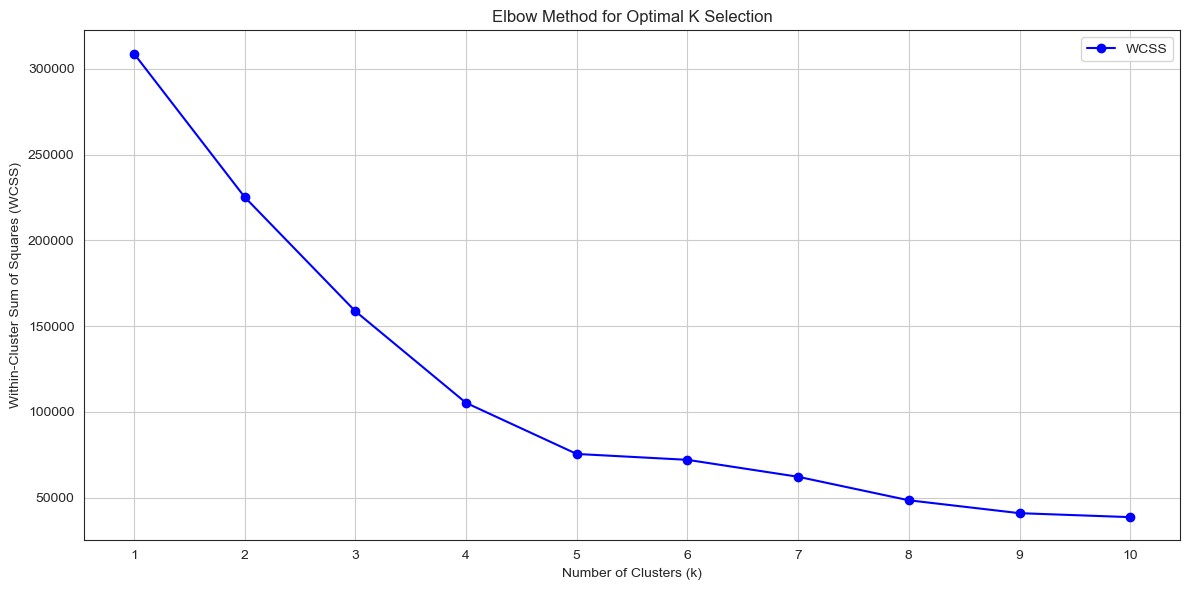

In [16]:
# Using Elbow Method to determine optimal number of clusters

# Model: The model here is the K means model. K specifies the number of clusters to form and also the number of centroids to generate. 
#        The value of K changes with each iteration of the loop, 
#        To evaluate the model performance for different numbers of clusters.
#        K-means++ is an optimized version of the standard K-means algorithm that 
#        selects initial cluster centers for K-mean clustering


# Interpretation: To identify the number of clusters we can look for a clear bend or change in direction in the WCSS plot. 
#                 we can observe that WCSS decreases rapidly as the number of clusters (k) increases
#                 The number of clusters where this bend occurs is K=4 or K=5 (like the elobow shape)
#                 As there is a clear "elbow" around k=5 we can make 5 clusters.                 

from sklearn.cluster import KMeans
k_range = range(1, 11) 
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++").fit(df.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='blue', label='WCSS')
plt.title('Elbow Method for Optimal K Selection')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\12094\anaconda3\envs\udemy\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


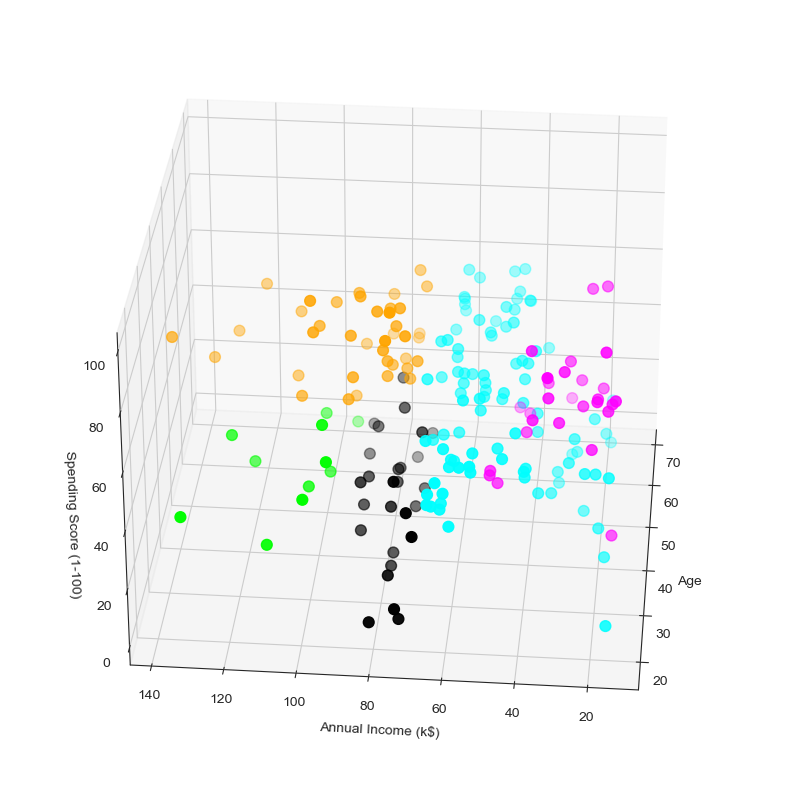

In [17]:
# Defines a KMeans model with five clusters, representing the desired number of customer segments.
# Assigns each data point to one of the five clusters based on their age, income, and spending score, 
# as we have taken all the 3 features for clustering.



km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

colors = ['magenta', 'lime', 'cyan', 'orange', 'black']
for i in range(5):
    ax.scatter(df.Age[df.label == i], df["Annual Income (k$)"][df.label == i], df["Spending Score (1-100)"][df.label == i], c=colors[i], s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [29]:
# Interpretation of the K means clustering -

# The 3d plot shows data points grouped into five clusters based on age, income, and spending habits.
# Cluster 0 (Magenta) are younger customers of age range 20-35 years old with income $30k-$60k have spending 50-70 score.
# Cluster 1 (Lime) are middle-aged customers of age range 40-50 years old with income $60k-$90k with low spending score 
# Cluster 2 (Cyan) are older customers (above 50) with higher income of above $90k with varied spending score.
# Cluster 3 (Black) are customers of age range 20 to 70 with  income range of $70k-$90k having low spending score.
# Cluster 4 (Orange) are older customers with  mostly $80k and above income with high spending score.

In [ ]:
# Reference Links:

# https://www.natasshaselvaraj.com/customer-segmentation-with-python/
# https://gist.github.com/LaurenzW/5218a7be743c9b9e17590a5d09f6ae57
# https://www.youtube.com/watch?v=FqIGui0rwh4( Youtube video on How to choose number of clusters using elbow method)
# Ref link for Model details - https://www.geeksforgeeks.org/ml-k-means-algorithm/ 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# github.com/Anubhav52/Arena-Hackathon
# github.com/Amarnayak862/data_science


